In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [2]:
file_path = 'data/aryl-1.csv'
data = pd.read_csv(file_path, encoding='utf-8', header=None)

# 删除第20列到第46列   #去除芳香卤卤化物的描述符
columns_to_drop = data.columns[19:45]  
data = data.drop(columns=columns_to_drop, axis=1)

# 将最后一列作为y，其他列作为x
y_exp = -data.iloc[:, -1].values  # 最后一列 加 负号
x_exp = data.iloc[:, :-1].values  # 前面所有列

X_all, Y_all = [x_exp, y_exp]

Y_all = Y_all.reshape(-1, 1)

X = X_all
Y = Y_all

num_samples_X = X.shape[0]  # X中的样本点个数
num_samples_Y = Y.shape[0]  # Y中的样本点个数

print(f"X中的原始样本点个数：{num_samples_X}")
print(f"Y中的原始样本点个数：{num_samples_Y}")


#去除存在nan的点
nan_indices = np.isnan(Y)
X = X[~nan_indices.flatten()]
Y = Y[~nan_indices.flatten()]

nan_count = np.sum(nan_indices)
print(f"包含NaN的点的个数：{nan_count}")


X中的原始样本点个数：264
Y中的原始样本点个数：264
包含NaN的点的个数：0


In [3]:
num_samples_X = X.shape  # X中的样本点个数
num_samples_Y = Y.shape # Y中的样本点个数

print(f"X中的最终样本点个数：{num_samples_X}")
print(f"Y中的最终样本点个数：{num_samples_Y}")

X中的最终样本点个数：(264, 94)
Y中的最终样本点个数：(264, 1)


In [ ]:
X_input_norm = X
y_PCE = Y 

In [11]:
X_df = pd.DataFrame(X)
X_df.describe()


,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,264.000000,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,264.000000,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,4.545455e-11,4.545455e-11,4.545454e-11,-4.545459e-11,-9.090907e-11,-9.090907e-11,9.090909e-11,-1.345725e-17,-5.382900e-17,0.000000,...,-2.500000e-10,-2.500000e-10,-2.018587e-17,-2.500000e-10,0.000000,-4.710037e-17,-2.691450e-17,2.355019e-17,-2.500000e-10,1.345725e-17
std,1.001773e+00,1.001773e+00,1.001773e+00,1.001773e+00,1.001773e+00,1.001773e+00,1.001773e+00,1.001773e+00,1.001773e+00,1.001773,...,1.001773e+00,1.001773e+00,1.001773e+00,1.001773e+00,1.001773,1.001773e+00,1.001773e+00,1.001773e+00,1.001773e+00,1.001773e+00
min,-1.626765e+00,-1.746296e+00,-2.551446e+00,-1.253266e+00,-1.842999e+00,-2.011855e+00,-1.376333e+00,-2.324492e+00,-1.536734e+00,-1.393121,...,-6.341035e-01,-9.873845e-01,-1.300052e+00,-7.232497e-01,-1.421899,-8.421658e-01,-9.538907e-01,-1.284167e+00,-1.329986e+00,-1.027237e+00
25%,-9.665634e-01,-7.955669e-01,-4.961854e-01,-6.920197e-01,-1.037291e+00,-8.484022e-01,-8.908419e-01,-8.542509e-01,-8.128653e-01,-0.862935,...,-6.046885e-01,-9.595837e-01,-8.049443e-01,-6.237003e-01,-0.634957,-7.420846e-01,-8.245751e-01,-4.276158e-01,-7.808184e-01,-9.857100e-01
50%,3.751890e-01,1.438441e-01,-1.353010e-01,-3.355526e-01,-1.262489e-01,-1.561929e-01,-4.761997e-02,4.067862e-02,1.028718e-01,-0.230602,...,-5.478477e-01,-1.652384e-01,1.180695e-01,-4.988175e-01,0.093442,-4.117276e-01,-3.055796e-01,-1.195442e-01,1.401894e-01,2.453609e-03
75%,6.609478e-01,6.803270e-01,4.996181e-01,1.473214e-01,8.420796e-01,1.122252e+00,5.911845e-01,5.840287e-01,6.566747e-01,1.063247,...,5.684082e-02,7.943452e-01,9.230138e-01,1.248828e-01,0.728399,3.303570e-01,5.189955e-01,3.080716e-01,9.210078e-01,9.881636e-01
max,2.321305e+00,1.486183e+00,1.867634e+00,2.503544e+00,1.675507e+00,1.374785e+00,2.405389e+00,2.437811e+00,1.816608e+00,1.753948,...,1.729799e+00,1.317861e+00,1.063914e+00,1.720885e+00,1.235014,1.665621e+00,1.565050e+00,1.523255e+00,1.049607e+00,1.022330e+00


In [12]:
unique_counts = X_df.nunique()
print(unique_counts)

0     22
1     21
2     22
3     22
4     20
      ..
89     4
90     4
91     4
92     4
93     4
Length: 94, dtype: int64


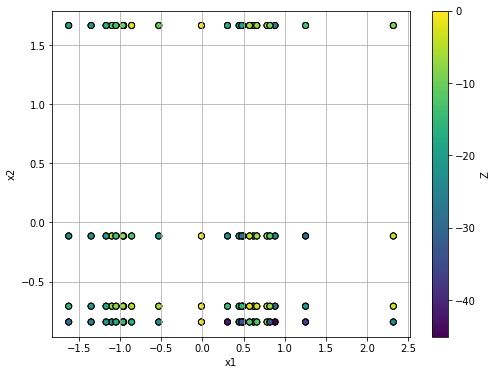

In [15]:

# 提取第36列和第42列作为x1和x2
x1 = X[:, 0]  # 第36列对应的索引为35
x2 = X[:, 89]  # 第42列对应的索引为41
Z = Y

#创建散点图
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=Z, cmap='viridis', marker='o', edgecolors='k')
plt.colorbar(label='Z')
plt.xlabel('x1')
plt.ylabel('x2')
# plt.title('二维散点图')
plt.grid(True)
plt.show()



